In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/animals'

In [11]:
classes = os.listdir(data_dir)

samples = {}

for i in range(9):
    sample_img = glob(os.path.join(data_dir, classes[i] + '/*'))[0]
    samples[classes[i]] = sample_img

print(samples)

label = list(samples.keys())
dir = list(samples.values())

print(label)
print(dir)

{'antelope': 'C:/Users/Windows10/Desktop/코딩/data/animals\\antelope\\02f4b3be2d.jpg', 'badger': 'C:/Users/Windows10/Desktop/코딩/data/animals\\badger\\00f56e5c92.jpg', 'bat': 'C:/Users/Windows10/Desktop/코딩/data/animals\\bat\\003bd60fa9.jpg', 'bear': 'C:/Users/Windows10/Desktop/코딩/data/animals\\bear\\039b2ae790.jpg', 'bee': 'C:/Users/Windows10/Desktop/코딩/data/animals\\bee\\0d562e4829.jpg', 'beetle': 'C:/Users/Windows10/Desktop/코딩/data/animals\\beetle\\02b34c63a2.jpg', 'bison': 'C:/Users/Windows10/Desktop/코딩/data/animals\\bison\\02116e752c.jpg', 'boar': 'C:/Users/Windows10/Desktop/코딩/data/animals\\boar\\0903d0db72.jpg', 'butterfly': 'C:/Users/Windows10/Desktop/코딩/data/animals\\butterfly\\016caf0681.jpg'}
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly']
['C:/Users/Windows10/Desktop/코딩/data/animals\\antelope\\02f4b3be2d.jpg', 'C:/Users/Windows10/Desktop/코딩/data/animals\\badger\\00f56e5c92.jpg', 'C:/Users/Windows10/Desktop/코딩/data/animals\\bat\\003bd60fa9.jp

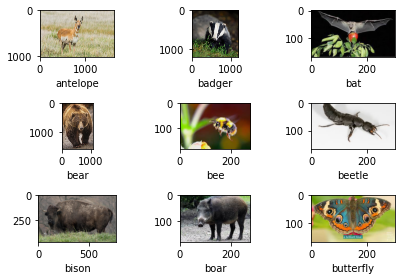

In [13]:
for i in range(9):
    cnt = i + 1
    plt.subplot(3,3,cnt)
    plt.imshow(img.imread(dir[i]))
    plt.xlabel(label[i])
plt.tight_layout()
plt.show()

In [15]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range= 0.2,
    shear_range= 0.2,
    horizontal_flip=True,
    validation_split= 0.2
)
test_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split= 0.2
)

train_set = train_gen.flow_from_directory(
    data_dir,
    target_size = (180, 180),
    class_mode = 'categorical',
    batch_size = 32,
    seed = 123,
    subset = 'training',
    shuffle = True
)

test_set = test_gen.flow_from_directory(
    data_dir,
    target_size = (180, 180),
    class_mode = 'categorical',
    batch_size = 32,
    seed = 123,
    subset = 'validation'
)

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [46]:
print(train_set.)
    

(180, 180)


In [56]:
model = Sequential([
    Conv2D(256, 3, activation = 'relu', input_shape = (180, 180, 3)),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(128, 3, activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(64, 3, activation = 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, 3, activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(len(classes)),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 178, 178, 256)     7168      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 89, 89, 256)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 87, 87, 128)       295040    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 43, 43, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 41, 41, 64)        73792     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 18, 18, 32)       

In [63]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam', metrics= ['acc'])

In [64]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience= 5, verbose= 1)
mc = ModelCheckpoint('/logs/fit', monitor= 'val_loss', verbose= 1, save_weights_only= True)

callback = [es, mc]

In [65]:
history = model.fit_generator(train_set, steps_per_epoch = 4320 // 32, epochs = 30, callbacks= callback, validation_data = test_set)

Epoch 1/30


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,90] and labels shape [2880]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-65-23b0d4a070a9>:1) ]] [Op:__inference_train_function_6963]

Function call stack:
train_function
